In [1]:
from config import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def getLog(camp, c0):
  inputPath = logPath + str(camp) + "/qlearning/v1-c0-" + str(c0) + ".txt"
  
  lines = []
  with open(inputPath) as f:
    lines = f.readlines()
  
  rewards = []
  clicks = []

  for line in lines[1:]:
    line = line.split('  ')
    reward = float(line[1].strip())
    click = int(line[2].strip())
    rewards.append(reward)
    clicks.append(click)
    
  rewards = np.array(rewards, dtype=float)
  clicks = np.array(clicks, dtype=int)
  return rewards, clicks

In [8]:
def getCost(rewards, clicks, scaling=100):
  cost = (clicks - rewards) * 100/scaling
  return cost

In [9]:
camp = campaigns[0]

In [10]:
rewards, clicks = getLog(camp, 32)
frac_cost = getCost(rewards, clicks)

In [11]:
savePath = plotPath + camp + "/"

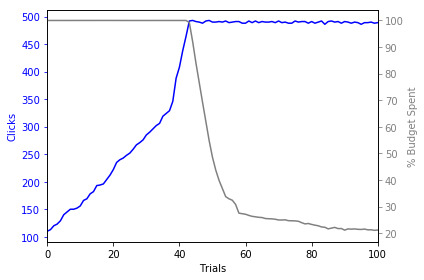

In [14]:
fig, ax1 = plt.subplots()

ax1.plot(clicks, 'blue')
ax1.set_xlabel('Trials')
ax1.set_xlim(0, 100)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(frac_cost, 'gray')
ax2.set_ylabel('% Budget Spent', color='gray')
ax2.tick_params('y', colors='gray')

fig.tight_layout()
plt.savefig(savePath + "Training", dpi=300)
plt.show()